In [1]:
import json
import pandas as pd
import seaborn as sns
# pd.set_option('display.max_rows', None)

In [2]:
with open("output.json") as r:
    js = json.load(r)

In [3]:
data = pd.DataFrame(js)

In [4]:
data.head(5)

,request_url,url,price,iptu,address,size,rooms,garages,bathroom,agency,type,relevance
0,https://www.zapimoveis.com.br/venda/casas/sc+f...,None,6.000.000,6.000,"Largo dos Acarais, Jurerê Internacional",800,5,2,5,None,list,Super destaque
1,https://www.zapimoveis.com.br/venda/casas/sc+f...,None,2.600.000,not text,"Rua das Piraúnas, Jurerê Internacional",300,4,5,4,None,list,Super destaque
2,https://www.zapimoveis.com.br/venda/casas/sc+f...,None,1.930.000,2.800,"Rua Itapuã, Itacorubi",430,6,4,6,None,list,Super destaque
3,https://www.zapimoveis.com.br/venda/casas/sc+f...,None,1.050.000,1.300,"Rua Waldemiro José Carlson, Canasvieiras",250,5,4,4,None,list,Destaque
4,https://www.zapimoveis.com.br/venda/casas/sc+f...,None,424.000,300,"Servidão Ester Gonçalves, São João do Rio Verm...",200,2,4,2,None,list,Destaque


In [5]:
data.loc[0, "request_url"]

'https://www.zapimoveis.com.br/venda/casas/sc+florianopolis/?pagina=1'

In [6]:
data.shape

(10032, 12)

In [7]:
data.columns

Index(['request_url', 'url', 'price', 'iptu', 'address', 'size', 'rooms',
       'garages', 'bathroom', 'agency', 'type', 'relevance'],
      dtype='object')

### Adress

In [8]:
data["address"].value_counts(10)

Ingleses do Rio Vermelho, Florianópolis                0.070076
Campeche, Florianópolis                                0.056719
São João do Rio Vermelho, Florianópolis                0.042863
Jurerê Internacional, Florianópolis                    0.032097
Lagoa da Conceição, Florianópolis                      0.017444
                                                         ...   
Servidão dos Bambuzais, Ribeirão da Ilha               0.000100
Servidão Aroldo Waldemiro Martins, Ribeirão da Ilha    0.000100
Rua do Prado, Vargem Grande                            0.000100
Rua Maria Claudino da Cruz, Capoeiras                  0.000100
Rua dos Chernes, Jurerê                                0.000100
Name: address, Length: 1402, dtype: float64

In [9]:
def map_bairro(data):
    data["bairro"] = "nao_identificado"
    data.loc[data["address"].str.contains("campeche", case=False), "bairro"] = "campeche"
    data.loc[data["address"].str.contains("morro das pedras", case=False), "bairro"] = "morro_das_pedras"
    data.loc[data["address"].str.contains("ingleses", case=False), "bairro"] = "ingleses"
    data.loc[data["address"].str.contains("lagoa", case=False), "bairro"] = "lagoa"
    data.loc[data["address"].str.contains("costeira", case=False), "bairro"] = "costeira"
    data.loc[data["address"].str.contains("tapera", case=False), "bairro"] = "tapera"
    data.loc[data["address"].str.contains("p.ntanal", case=False), "bairro"] = "pantanal"
    data.loc[data["address"].str.contains("p.ntano", case=False), "bairro"] = "pantano"
    data.loc[data["address"].str.contains("centro", case=False), "bairro"] = "centro"
    data.loc[data["address"].str.contains("jurer.", case=False), "bairro"] = "jurere"
    data.loc[data["address"].str.contains("trindade", case=False), "bairro"] = "trindade"
    data.loc[data["address"].str.contains("c.rrego grande", case=False), "bairro"] = "corrego_grande"
    data.loc[data["address"].str.contains("cac.p.", case=False), "bairro"] = "cacupe"
    data.loc[data["address"].str.contains("carvoeira", case=False), "bairro"] = "carvoeira"
    data.loc[data["address"].str.contains("itacorubi", case=False), "bairro"] = "itacorubi"
    data.loc[data["address"].str.contains("ribeir.o", case=False), "bairro"] = "ribeirao"
    data.loc[data["address"].str.contains("itagua.u", case=False), "bairro"] = "itaguacu"
    data.loc[data["address"].str.contains("estreito", case=False), "bairro"] = "estreito"
    data.loc[data["address"].str.contains("daniela", case=False), "bairro"] = "daniela"
    data.loc[data["address"].str.contains("canasvieiras", case=False), "bairro"] = "canasvieiras"
    data.loc[data["address"].str.contains("coqueiros", case=False), "bairro"] = "coqueiros"
    data.loc[data["address"].str.contains("capoeiras", case=False), "bairro"] = "capoeiras"
    data.loc[data["address"].str.contains("saco grande", case=False), "bairro"] = "saco grande"
    data.loc[data["address"].str.contains("cachoeira", case=False), "bairro"] = "cachoeira"
    data.loc[data["address"].str.contains("praia mole", case=False), "bairro"] = "praia_mole"
    data.loc[data["address"].str.contains("carianos", case=False), "bairro"] = "carianos"
    data.loc[data["address"].str.contains("m.nica", case=False), "bairro"] = "monica"
    data.loc[data["address"].str.contains("jo.o paulo", case=False), "bairro"] = "joao_paulo"
    data.loc[data["address"].str.contains("s.o jorge", case=False), "bairro"] = "sao_jorge"
    data.loc[data["address"].str.contains("sambaqui", case=False), "bairro"] = "sambaqui"
    data.loc[data["address"].str.contains("ratones", case=False), "bairro"] = "ratones"
    data.loc[data["address"].str.contains("jardim atl.ntico", case=False), "bairro"] = "jardim_atlantico"
    data.loc[data["address"].str.contains("rio tavares", case=False), "bairro"] = "rio tavares"
    data.loc[data["address"].str.contains("agron.mica", case=False), "bairro"] = "agronomica"
    data.loc[data["address"].str.contains("saco dos lim.es", case=False), "bairro"] = "saco_dos_limoes"
    data.loc[data["address"].str.contains("s.o jo.o do rio vermelho", case=False), "bairro"] = "sao_joao_do_rio_vermelho"
    data.loc[data["address"].str.contains("santo ant.nio", case=False), "bairro"] = "santo_antonio_de_lisboa"
    

In [10]:
map_bairro(data)

In [11]:
data["bairro"].value_counts(50)

ingleses                    0.137659
campeche                    0.120116
jurere                      0.093900
sao_joao_do_rio_vermelho    0.073864
nao_identificado            0.059410
lagoa                       0.050738
cachoeira                   0.038776
canasvieiras                0.031499
monica                      0.027711
ribeirao                    0.025419
corrego_grande              0.023824
rio tavares                 0.022528
itacorubi                   0.020833
jardim_atlantico            0.020435
centro                      0.020235
trindade                    0.018341
pantano                     0.017843
carianos                    0.017644
capoeiras                   0.017544
itaguacu                    0.015849
joao_paulo                  0.015550
estreito                    0.014454
sao_jorge                   0.013457
coqueiros                   0.012759
pantanal                    0.010167
agronomica                  0.009370
saco_dos_limoes             0.009370
c

### Price

In [12]:
data["price"].head()

0    6.000.000
1    2.600.000
2    1.930.000
3    1.050.000
4      424.000
Name: price, dtype: object

In [13]:
def format_price(df, variable="price"):
    df[variable] = df[variable].str.replace(".", "")
    df[variable] = df[variable].astype(float)

In [14]:
format_price(data, variable="price")

In [15]:
data["price"].head()

0    6000000.0
1    2600000.0
2    1930000.0
3    1050000.0
4     424000.0
Name: price, dtype: float64

In [16]:
data["price"].describe()

count    1.003200e+04
mean     1.318570e+06
std      1.693841e+06
min      1.500000e+04
25%      5.830000e+05
50%      8.700000e+05
75%      1.448820e+06
max      3.700000e+07
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

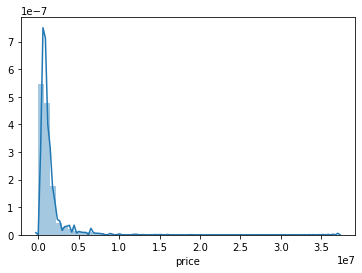

In [17]:
sns.distplot(data["price"])

In [18]:
data.loc[data["bairro"] == "campeche", "price"].describe()

count    1.205000e+03
mean     9.509603e+05
std      5.075799e+05
min      2.300000e+05
25%      6.698700e+05
50%      7.980000e+05
75%      1.100000e+06
max      5.000000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

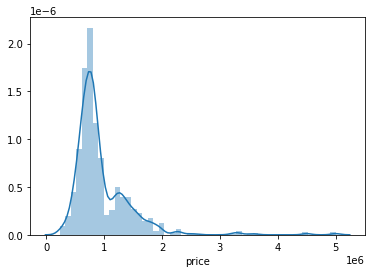

In [19]:
sns.distplot(data.loc[data["bairro"] == "campeche", "price"])

### IPTU

In [20]:
data["iptu"].value_counts()

not text    4975
1.200        211
1.000        161
800          142
500          126
            ... 
1.603          1
1.785          1
693            1
72             1
633            1
Name: iptu, Length: 997, dtype: int64

In [21]:
def format_iptu(df, variable="iptu"):
    data.loc[data[variable] == "not text", variable] = '-9999'
    data[variable] = data[variable].str.replace(".", "")
    data[variable] = data[variable].astype(float)
    data.loc[data[variable] <= 10, variable] = -9999
    data.loc[data[variable] >= 15000, variable] = 50000

In [22]:
format_iptu(data, variable="iptu")

In [23]:
data["iptu"].describe()

count    10032.000000
mean     -4311.123704
std       6445.033206
min      -9999.000000
25%      -9999.000000
50%      -9999.000000
75%        900.000000
max      50000.000000
Name: iptu, dtype: float64

<AxesSubplot:xlabel='iptu'>

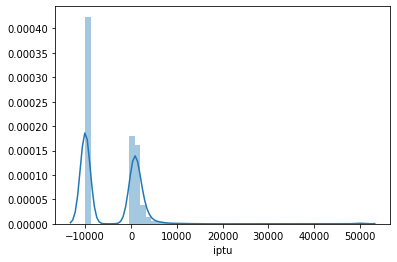

In [24]:
sns.distplot(data["iptu"])

### size

In [25]:
data["size"] = data["size"].astype(float)

In [26]:
data["size"].astype(float).describe()

count     10032.000000
mean        391.974980
std        6183.363507
min           1.000000
25%         136.000000
50%         203.000000
75%         300.000000
max      371800.000000
Name: size, dtype: float64

In [27]:
data["size"].isnull().sum()

0

### rooms

In [28]:
data.loc[data["rooms"] == "not text", "rooms"] = 6

In [29]:
data["rooms"] = data["rooms"].astype(int)

In [30]:
data["rooms"].value_counts()

3     4293
4     2562
2     1453
5     1076
6      354
1       97
7       86
8       47
10      21
11      12
9        8
14       6
12       5
15       5
18       3
13       3
16       1
Name: rooms, dtype: int64

In [31]:
data["rooms"].describe()

count    10032.000000
mean         3.524123
std          1.292917
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         18.000000
Name: rooms, dtype: float64

In [32]:
data.loc[(data["rooms"] == 2) & (data["bairro"] == "campeche"), "price"].mean()

716515.0

### garages

In [33]:
data.loc[data["garages"] == "not text", "garages"] = -1

In [34]:
data["garages"] = data["garages"].astype(int)

In [35]:
data["garages"].describe()

count    10032.000000
mean         2.698963
std          2.055817
min         -1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         33.000000
Name: garages, dtype: float64

In [36]:
data["garages"].value_counts()

 2     3596
 4     1793
 1     1564
 3     1444
-1      517
 5      467
 6      336
 8      111
 7       83
 10      62
 9       16
 12      13
 20       8
 16       6
 33       4
 11       4
 15       3
 21       1
 22       1
 24       1
 30       1
 19       1
Name: garages, dtype: int64

### bathroom

In [37]:
data.loc[data["bathroom"] == "not text", "bathroom"] = 2

In [38]:
data["bathroom"] = data["bathroom"].astype(int)

In [39]:
data["bathroom"].describe()

count    10032.00000
mean         3.21551
std          1.66146
min          1.00000
25%          2.00000
50%          3.00000
75%          4.00000
max         22.00000
Name: bathroom, dtype: float64

<AxesSubplot:xlabel='bathroom'>

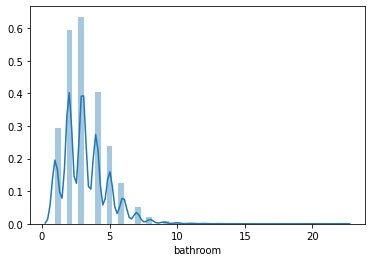

In [40]:
sns.distplot(data["bathroom"])

## Feature Selection

In [41]:
features_to_keep = ["bairro", "bathroom", "garages", "rooms", "size", "iptu"]
continuous_features = ["iptu", "rooms", "size", "garages", "bathroom"]
categorical_features = ["bairro"]

In [42]:
train = data[features_to_keep]
y = data["price"]

In [43]:
train.head()

,bairro,bathroom,garages,rooms,size,iptu
0,jurere,5,2,5,800.0,6000.0
1,jurere,4,5,4,300.0,-9999.0
2,itacorubi,6,4,6,430.0,2800.0
3,canasvieiras,4,4,5,250.0,1300.0
4,sao_joao_do_rio_vermelho,2,4,2,200.0,300.0


In [44]:
train.isnull().sum()

bairro      0
bathroom    0
garages     0
rooms       0
size        0
iptu        0
dtype: int64

### Encode

In [45]:
from category_encoders import TargetEncoder

In [46]:
features_to_encode = categorical_features
encoder_params = {
    "cols": features_to_encode,
    "drop_invariant": 0,
    "return_df": 1,
    "handle_unknown": "value",
    "smoothing": 1,
    "verbose": 1,
}

encoder = TargetEncoder(**encoder_params)

In [47]:
encoder.fit(X=train[features_to_encode], y=y.values)

TargetEncoder(cols=['bairro'], drop_invariant=0, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=1,
              smoothing=1.0, verbose=1)

In [48]:
train.loc[:, features_to_encode] = encoder.transform(train[features_to_encode])

/home/wb/gitrepos/itau_cartoes_fns_20210220/venv/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [49]:
train.head()

,bairro,bathroom,garages,rooms,size,iptu
0,4.581730e+06,5,2,5,800.0,6000.0
1,4.581730e+06,4,5,4,300.0,-9999.0
2,1.440262e+06,6,4,6,430.0,2800.0
3,1.016602e+06,4,4,5,250.0,1300.0
4,3.997432e+05,2,4,2,200.0,300.0


### Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
scaler.fit(train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
train.loc[:, :] = scaler.transform(train)

/home/wb/gitrepos/itau_cartoes_fns_20210220/venv/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [53]:
train.head()

,bairro,bathroom,garages,rooms,size,iptu
0,2.923034,1.074103,-0.340010,1.141567,0.065991,1.599936
1,2.923034,0.472192,1.119336,0.368083,-0.014875,-0.882565
2,0.109008,1.676013,0.632888,1.915050,0.006150,1.103404
3,-0.270493,0.472192,0.632888,1.141567,-0.022962,0.870655
4,-0.823056,-0.731628,0.632888,-1.178884,-0.031049,0.715489


### ML Regression Model

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
model = RandomForestRegressor(max_depth=7, n_estimators=250, max_features="sqrt")

In [56]:
model.fit(X=train, y=y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Prediction

In [57]:
d = {"address": ["campeche"], "bathroom": [2], "garages": [1], "rooms": [2], "size": [88], "iptu": [270]}
test = pd.DataFrame(data=d)

In [58]:
test.head()

,address,bathroom,garages,rooms,size,iptu
0,campeche,2,1,2,88,270


In [59]:
map_bairro(test)
# format_iptu(test)
test["rooms"] = test["rooms"].astype(int)
test["bathroom"] = test["bathroom"].astype(int)
test["garages"] = test["garages"].astype(int)

test = test[features_to_keep]
test.loc[:, features_to_encode] = encoder.transform(test[features_to_encode])
test.loc[:, :] = scaler.transform(test)

In [60]:
test.head()

,bairro,bathroom,garages,rooms,size,iptu
0,-0.329293,-0.731628,-0.826459,-1.178884,-0.049163,0.710835


In [64]:
model.predict(test).round(2)

array([508958.1])

### Sanity Test

In [73]:
bool1 = data["iptu"] <= 400
bool2 = data["bairro"] <= "campeche"
bool3 = data["rooms"] <= 2
bool4 = data["bathroom"] <= 2
bool5 = data["size"] <= 130

all_bools = (bool1 & bool2 & bool3 & bool4 & bool5)

In [74]:
data.loc[all_bools, "price"].count()

96

In [75]:
data.loc[all_bools, "price"].mean()

555415.3541666666

In [76]:
data.loc[all_bools, "price"].median()

500000.0

<AxesSubplot:xlabel='price'>

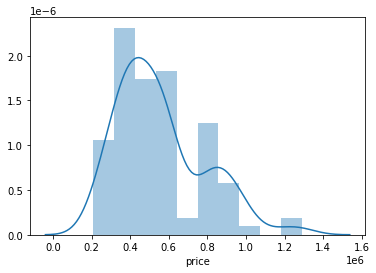

In [77]:
sns.distplot(data.loc[all_bools, "price"])

### Esta previsao parece bem coerente!